In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
dataset = pd.read_csv('data/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values
print(X.shape, y.shape)

(10, 1) (10,)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 1)
(3, 1)
(7,)
(3,)


### ※ polynomial data transform

In [7]:
# 지정한 degree로 X(특징)를 확장함
from sklearn.preprocessing import PolynomialFeatures
pos_poly = PolynomialFeatures(degree = 2)
pos_poly.fit(X_train)
Xp_train = pos_poly.transform(X_train)
Xp_test = pos_poly.transform(X_test)

In [8]:
print(Xp_train.shape)
print(Xp_test.shape)

(7, 3)
(3, 3)


In [9]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(Xp_train,y_train)

LinearRegression()

In [10]:
y_pred = poly_reg.predict(Xp_test)

In [11]:
sLR = LinearRegression()
sLR.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred_slr = sLR.predict(X_test)

In [13]:
X_train.shape

(7, 1)

In [14]:
poly_reg.predict(Xp_train)

array([921083.44955351,  20557.23236402, 250621.1361129 , 429739.9096605 ,
       -20523.19893424, 107650.44441206, 115871.02683125])

In [15]:
np.sort(X_train, axis = 0)

array([[ 1],
       [ 2],
       [ 4],
       [ 6],
       [ 7],
       [ 8],
       [10]], dtype=int64)

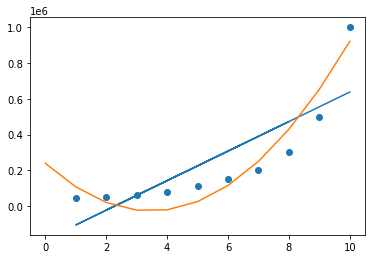

In [16]:
plt.scatter(X,y)
plt.plot(X_train,sLR.predict(X_train))

posTmp = np.arange(11).reshape(-1,1)
poly_pos = pos_poly.transform(posTmp)
plt.plot(posTmp,poly_reg.predict(poly_pos))